# Can you help reduce employee turnover?



## 📖 Background
You work for the human capital department of a large corporation. The Board is worried about the relatively high turnover, and your team must look into ways to reduce the number of employees leaving the company.

The team needs to understand better the situation, which employees are more likely to leave, and why. Once it is clear what variables impact employee churn, you can present your findings along with your ideas on how to attack the problem.

## 💾 The data
The department has assembled data on almost 10,000 employees. The team used information from exit interviews, performance reviews, and employee records.

- "department" - the department the employee belongs to.
- "promoted" - 1 if the employee was promoted in the previous 24 months, 0 otherwise.
- "review" - the composite score the employee received in their last evaluation.
- "projects" - how many projects the employee is involved in.
- "salary" - for confidentiality reasons, salary comes in three tiers: low, medium, high.
- "tenure" - how many years the employee has been at the company.
- "satisfaction" - a measure of employee satisfaction from surveys.
- "bonus" - 1 if the employee received a bonus in the previous 24 months, 0 otherwise.
- "avg_hrs_month" - the average hours the employee worked in a month.
- "left" - "yes" if the employee ended up leaving, "no" otherwise.

## 💪 Competition challenge

Create a report that covers the following:
1. Which department has the highest employee turnover? Which one has the lowest?
2. Investigate which variables seem to be better predictors of employee departure.
3. What recommendations would you make regarding ways to reduce employee turnover?

## 🧑‍⚖️ Judging criteria

| CATEGORY | WEIGHTING | DETAILS                                                              |
|:---------|:----------|:---------------------------------------------------------------------|
| **Recommendations** | 35%       | <ul><li>Clarity of recommendations - how clear and well presented the recommendation is.</li><li>Quality of recommendations - are appropriate analytical techniques used & are the conclusions valid?</li><li>Number of relevant insights found for the target audience.</li></ul>       |
| **Storytelling**  | 35%       | <ul><li>How well the data and insights are connected to the recommendation.</li><li>How the narrative and whole report connects together.</li><li>Balancing making the report in-depth enough but also concise.</li></ul> |
| **Visualizations** | 20% | <ul><li>Appropriateness of visualization used.</li><li>Clarity of insight from visualization.</li></ul> |
| **Votes** | 10% | <ul><li>Up voting - most upvoted entries get the most points.</li></ul> |

## ✅ Checklist before publishing into the competition
- Rename your workspace to make it descriptive of your work. N.B. you should leave the notebook name as notebook.ipynb.
- Remove redundant cells like the judging criteria, so the workbook is focused on your story.
- Make sure the workbook reads well and explains how you found your insights.
- Check that all the cells run without error.

#1. Which department has the highest employee turnover? Which one has the lowest?


In [1]:
#Import lib for report
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [2]:
#import data
data= pd.read_csv('/content/employee_churn_data.csv')
#show inforamtion about data
print(data.head(5))
print(data.info())

   department  promoted    review  projects  salary  tenure  satisfaction  \
0  operations         0  0.577569         3     low     5.0      0.626759   
1  operations         0  0.751900         3  medium     6.0      0.443679   
2     support         0  0.722548         3  medium     6.0      0.446823   
3   logistics         0  0.675158         4    high     8.0      0.440139   
4       sales         0  0.676203         3    high     5.0      0.577607   

   bonus  avg_hrs_month left  
0      0     180.866070   no  
1      0     182.708149   no  
2      0     184.416084   no  
3      0     188.707545   no  
4      1     179.821083   no  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9540 entries, 0 to 9539
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   department     9540 non-null   object 
 1   promoted       9540 non-null   int64  
 2   review         9540 non-null   float64
 3   projects       9540

In [3]:
#make sure columns don't have any NaN value in columns
print(data['department'].unique())
print(data['left'].unique())

['operations' 'support' 'logistics' 'sales' 'IT' 'admin' 'engineering'
 'marketing' 'finance' 'retail']
['no' 'yes']


In [4]:
data1= data
print(data1['left'].unique())
#Find how many employees are left in each department?
data1 = pd.DataFrame(data1[['department','left']].value_counts(),columns=['total']).reset_index()
print(data1.value_counts())

['no' 'yes']
department   left  total
IT           no    246      1
             yes   110      1
support      no    523      1
sales        yes   537      1
             no    1346     1
retail       yes   471      1
             no    1070     1
operations   yes   436      1
             no    1086     1
marketing    yes   243      1
             no    559      1
logistics    yes   111      1
             no    249      1
finance      yes   108      1
             no    294      1
engineering  yes   437      1
             no    1079     1
admin        yes   119      1
             no    304      1
support      yes   212      1
dtype: int64


## Answer the question is: Which department has the highest employee turnover? Which one has the lowest?


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


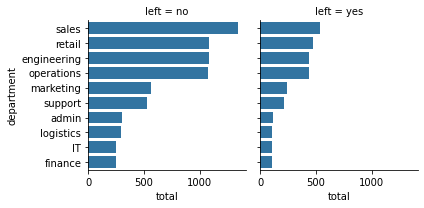

In [5]:
#plot to find which department has the highest employee turnover? Which one has the lowest?
g = sns.FacetGrid(data1, col='left')
g.map(sns.barplot,'total','department')

1. The Sale Department has highest the employee turn over than others, about 537 employee
2. The Finance Department has the lowest the employee turn over than others, about 108 employee

# Investigate which variables seem to be better predictors of employee departure.


In [6]:
data2 = data
#make dictionary for strings in columns
left_dict ={"no":0,"yes":1}
department_dict={"sales":0,"retail":1,"operations":2,"engineering":3,"marketing":4,"support":5,"admin":6,"finance":7,"logistics":8,"IT":9}
salary_dict ={"low":0,"high":2,"medium":1}


In [7]:
#covert string to numbers
data2['left'] = data2['left'].map(left_dict)
data2['department'] = data2['department'].map(department_dict)
data2['salary'] = data2['salary'].map(salary_dict)

In [8]:
#convert float to int
data2['review'] =data2['review']*100
data2['satisfaction'] = data2['satisfaction']*100
data2 = data2.astype(int)
data2.head(5)

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
0,2,0,57,3,0,5,62,0,180,0
1,2,0,75,3,1,6,44,0,182,0
2,5,0,72,3,1,6,44,0,184,0
3,8,0,67,4,2,8,44,0,188,0
4,0,0,67,3,2,5,57,1,179,0


##Correlations between variables

"department" - the department the employee belongs to.

"promoted" - 1 if the employee was promoted in the previous 24 months, 0 otherwise.

"review" - the composite score the employee received in their last evaluation.

"projects" - how many projects the employee is involved in.

"salary" - for confidentiality reasons, salary comes in three tiers: low, medium, high.

"tenure" - how many years the employee has been at the company.

"satisfaction" - a measure of employee satisfaction from surveys.

"bonus" - 1 if the employee received a bonus in the previous 24 months, 0 otherwise.

"avg_hrs_month" - the average hours the employee worked in a month.

"left" - "yes" if the employee ended up leaving, "no" otherwise.

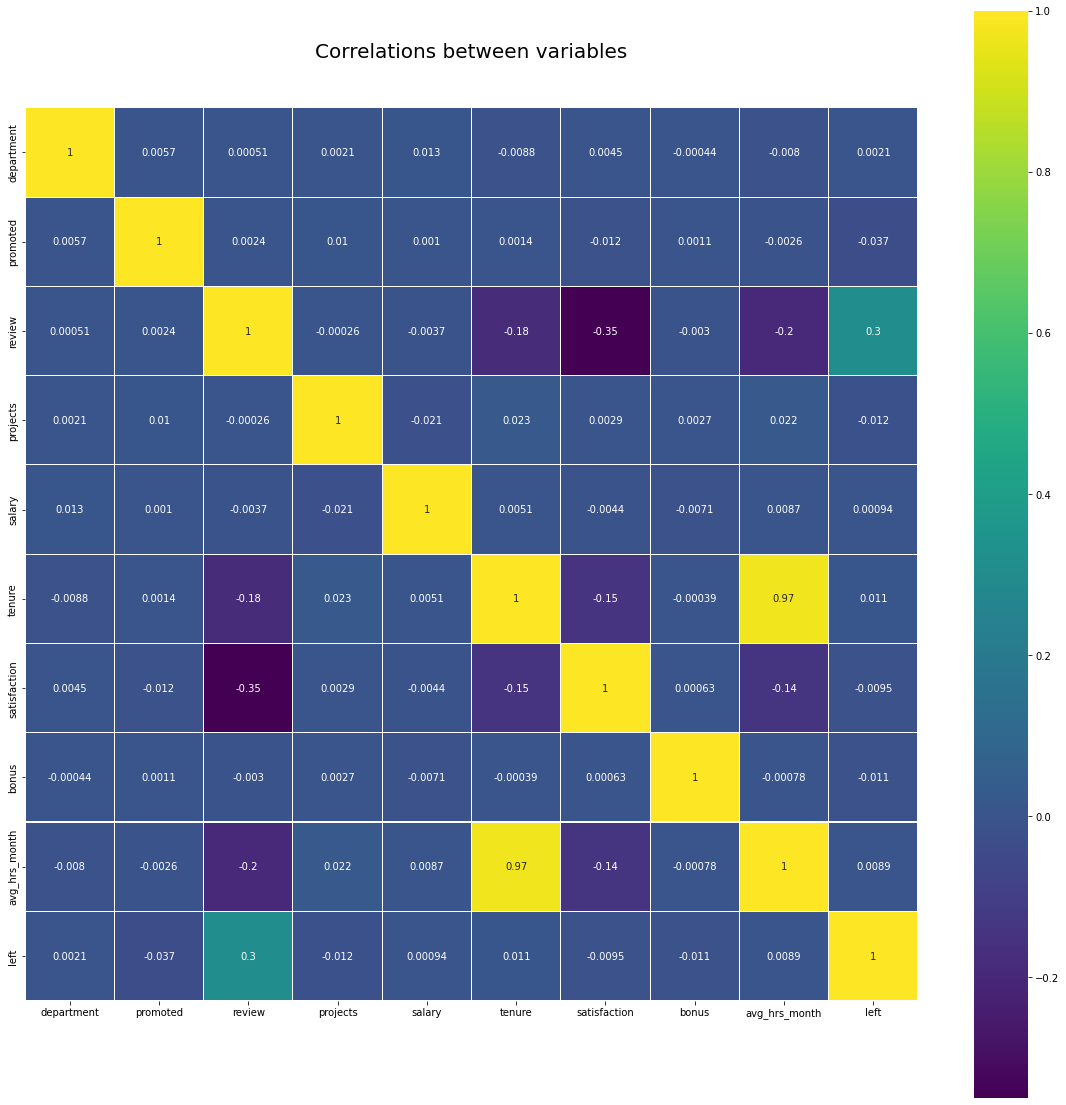

In [9]:
#plot correlations between scores
colormap = plt.cm.viridis
plt.figure(figsize=(20,20))
plt.title('Correlations between variables', y=1.05, size=20)
sns.heatmap(data2.corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white',annot=True)

Text(0.5, 1.0, 'review and left')

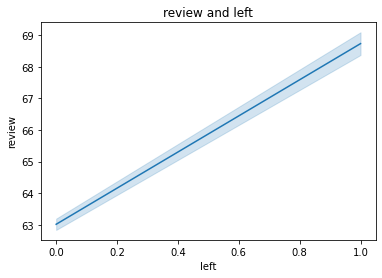

In [10]:
sns.lineplot(data=data2,y='review',x='left').set_title('review and left')

The review of employees has correlations with the employees who left. So that means the more high review employees, the more they will leave the company.

But also in the Correlations between variables chart. I find out what are correlations with the review variable, and they are:

1. The lower avg_hrs_month, satisfaction, tenure, the more high review.
2. The more avg_hrs month, the more tenure.
3. Promoted and department are not the reason why employees left company

We need to dig deeper about this problem and answer the question of why the good employees are going to go to leave the company

#Dig Deeper


1. The lower avg_hrs_month, satisfaction, tenure, the more high the review score.
2. The more avg_hrs month they do, the more tenure they have.

### Avg_hrs_month and review

Text(0.5, 1.0, 'avg_hrs_month and review of left')

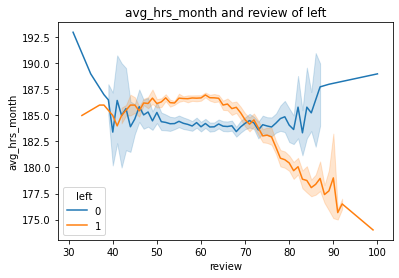

In [11]:
sns.lineplot(data=data2,x='review',y='avg_hrs_month',hue='left').set_title('avg_hrs_month and review of left')

The chart avg_hrs_month and review show us 3 pieces of information: 
1. The average hours in the month of employees are 185hrs.
2. If the employees had worked well, and had spent less time than average hours, they left their company.
3. if the employees had worked badly, and had spent more time than average hours, they left their company.

##Review and tenure of left

Text(0.5, 1.0, 'review and tenure of left')

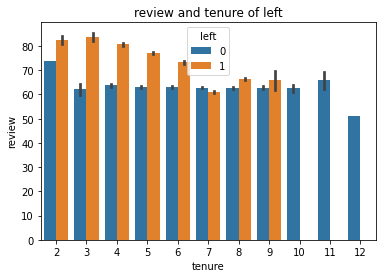

In [12]:
sns.barplot(data=data2,y='review',x='tenure',hue='left').set_title('review and tenure of left')

The char Review and tenure of the left show us:
A lot of employees who worked for the company in 2-6 years got review scores over 60%, had left the company.

## Tenure and avg_hrs_month

Text(0.5, 1.0, 'tenure and avg_hrs_month')

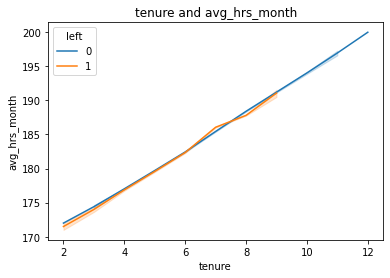

In [13]:
sns.lineplot(data=data2,x='tenure',y='avg_hrs_month',hue='left').set_title('tenure and avg_hrs_month')

The chart tenure and avg_hrs_month show us information:
- The more tenure they have, the more avg_hrs_month they do. That means a lot of longtime employees had worked more hours than the new ones.

##Tenure and left

Text(0.5, 1.0, 'tenure and left')

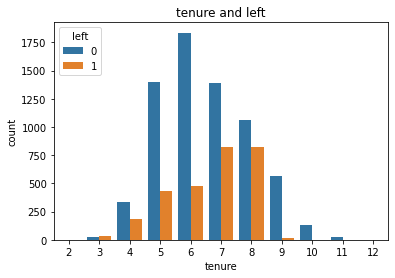

In [14]:
sns.countplot(data=data2,x='tenure',hue='left').set_title('tenure and left')

The chart tenure and left show us: A lot of employees had left the company after work from 5 - 8 years.

##The first conclusion

Conclusions from 4 charts
-  Avg_hrs_month and review
-  Tenure and avg_hrs_month
-  Tenure and left
-  Review and tenure of left

A lot of employees had left the company after work from 5 - 8 years and they also had had had more than 185h avg_hrs_month

If the employees had worked well, and had spent less time than average hours, they left their company.

If the employees had worked badly, and had spent more time than average hours, they left their company.

A lot of employees who worked for the company in 2-6 years got review scores over 60%, had left the company.


My thinking:
1. After 5 - 8 years had worked in the company, and they didn't find any motivation to continue their work in the company, so they worked not well and left the company.
2. After 5 - 8 years had worked in the company, a lot of employees had knowledge are outdated, so they spent more time at work but they did not good enough to get a good review score, so they left the company.
3. A lot of employees who had worked for the company in 2-6 years,  left the company, because they didn't see any challenges or if they motivation to continue their work in the company

##Reivew and satisfaction of left

Text(0.5, 1.0, 'reivew and satisfaction of left')

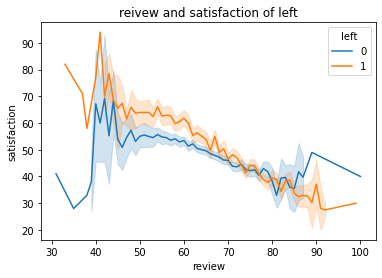

In [15]:
sns.lineplot(data=data2,x='review',y='satisfaction',hue='left').set_title('reivew and satisfaction of left')

The chart review and satisfaction show us that: there is no meaning of correlation between satisfaction and the review.

##Satisfaction and left

Text(0.5, 1.0, 'satisfaction and left')

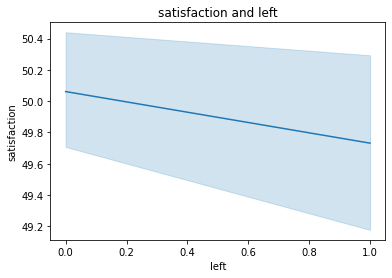

In [16]:
sns.lineplot(data=data2,y='satisfaction',x='left').set_title('satisfaction and left')

The chart satisfaction and left show us that:
If the employees' satisfaction had below 50%, they were more get closer leave their jobs.

Text(0.5, 1.0, 'satisfaction and tenure of left')

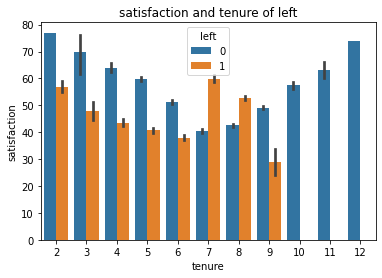

In [17]:
sns.barplot(data=data2,x='tenure',y='satisfaction',hue='left').set_title('satisfaction and tenure of left')

The chart satisfaction and tenure of left show us:
The employees who had worked for 2-9 years, if they had had lower satisfaction, below 60%, they left their job.

##The second conclusion

Conclusions from 2 charts:
-  Review and satisfaction of left.
-  Satisfaction and left

There is no meaning of correlation between satisfaction and the review. 

The more high satisfaction they had, the lower score review they had received and if satisfaction had below 50%, they were more get closer leave their jobs. 

The employees who had worked for 2-9 years, if they had had lower satisfaction, below 60%, they left their job.

My thinking:

The review and satisfaction doesn't show us any correlations or a big picture. But the thing I sure that, if the satisfaction of employees not hight enough, they will leave the company

#Find a model for predicting employee departure.

In [18]:
data3=data
X =data3.drop('left',axis=1)
y = data3['left']
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.33)

In [19]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_predict = clf.predict(X_test)
accuracy_score =  accuracy_score(y_test,y_predict)
accuracy_score

0.8196252778659892

The model for classification and predicting employee departure is DecisionTreeClassifier which is more accurate than 82%.

#3. What recommendations would you make regarding ways to reduce employee turnover?

My recomendations:
- Increase the satisfaction of employees of the company. Make a survey regularly and find out what they want and need.
- Update knowledge of employees, so they will work effectively and make sure they get help on their work. We also don't want them spend a lot of time on their work.
- Find the best work/position for employees, maybe some challenges, we want every employee to feel their work/position worth for their talents and show them the future of their career path if they continue work for the company.